In [3]:
import pandas as pd
import numpy as np 
import joblib
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder


In [4]:
df=pd.read_csv('CarPricesPrediction.csv',index_col=0)
df.reset_index(drop=True,inplace=True)

In [5]:
df

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


# Data Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [11]:
df.isnull().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


# Exploratory Data Analysis (EDA)

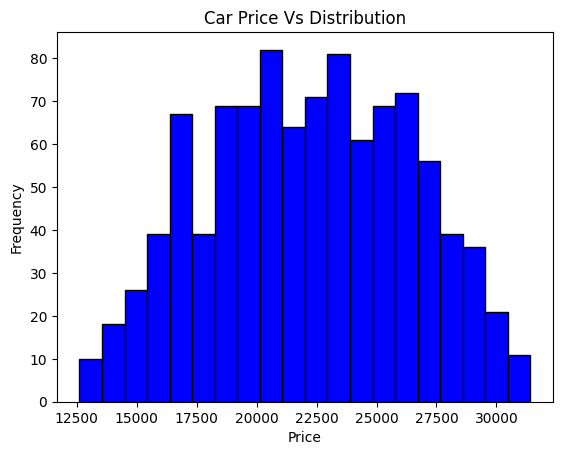

In [19]:
plt.hist(df['Price'],bins=20,color='blue',edgecolor='black')
plt.title("Car Price Vs Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.savefig('Car Price Vs Distribution.png', bbox_inches='tight', dpi=200)

plt.show()

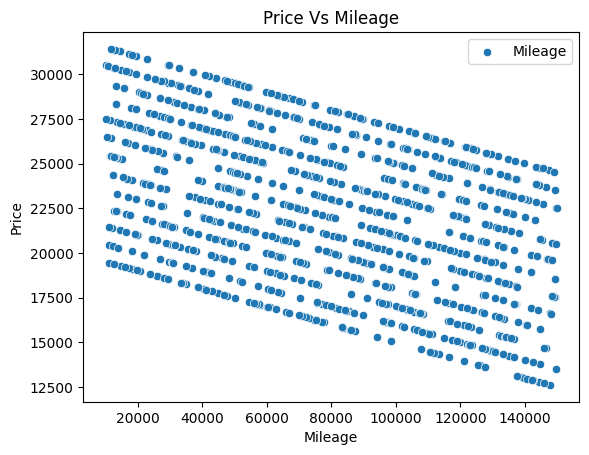

In [21]:
sns.scatterplot(x=df['Mileage'],y=df['Price'])
plt.title('Price Vs Mileage')
plt.legend(["Mileage","Price"])
plt.savefig('Price Vs Mileage.png', bbox_inches='tight', dpi=200)

plt.show()

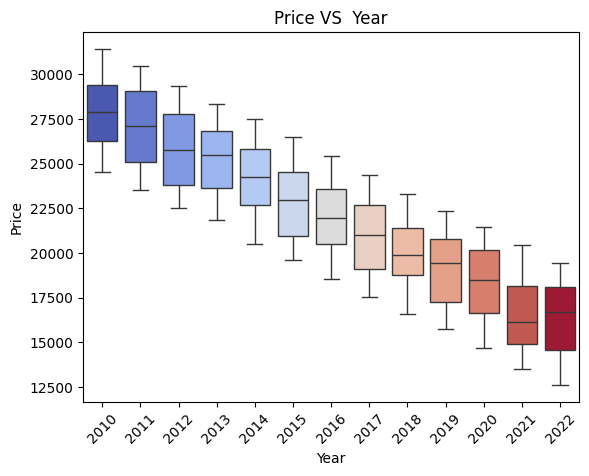

In [22]:
sns.boxplot(x="Year", y="Price", hue="Year", data=df, palette="coolwarm", legend=False)  
plt.xticks(rotation=45)
plt.title('Price VS  Year')
plt.savefig('Price VS  Year.png', bbox_inches='tight', dpi=200)

plt.show()

In [24]:
make_encoder = LabelEncoder()
model_encoder = LabelEncoder()
condition_encoder = LabelEncoder()

In [27]:
df["Make"] = make_encoder.fit_transform(df["Make"])
df["Model"] = model_encoder.fit_transform(df["Model"])
df["Condition"] = condition_encoder.fit_transform(df["Condition"])

In [29]:
joblib.dump(make_encoder, "make_encoder.pkl")
joblib.dump(model_encoder, "model_encoder.pkl")
joblib.dump(condition_encoder, "condition_encoder.pkl")

['condition_encoder.pkl']

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   int32  
 1   Model      1000 non-null   int32  
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   int32  
 5   Price      1000 non-null   float64
dtypes: float64(1), int32(3), int64(2)
memory usage: 35.3 KB


# Model Training & Evalution

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
# now the data separate in X and Y
X=df.drop('Price',axis=1)
Y=df['Price']
# now split the data in X and Y
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.2,random_state=42)

In [35]:
# now fit the model
rf_model=RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_split=2,random_state=42)
rf_model.fit(X_train,Y_train);
print("model Accuracy :",rf_model.score(X_test,Y_test))

model Accuracy : 0.9878410172853085


In [37]:
y_pred=rf_model.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)

In [39]:
print(f"MAE:{mae}")
print(f"MSE :{mse}")
print(f"r2 :{r2}")

MAE:355.32441906250125
MSE :211972.06621955478
r2 :0.9878410172853085


# Fearture importance

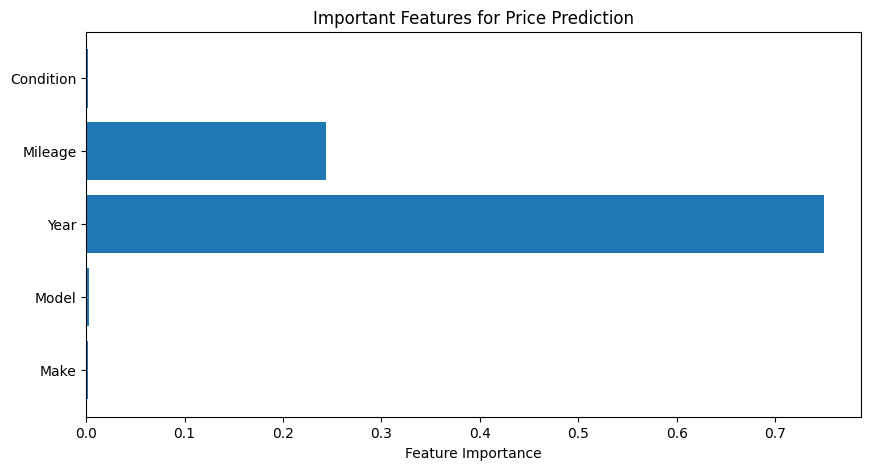

In [41]:
# Feature Importance 
importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Important Features for Price Prediction")
plt.savefig('Important Features for Price Prediction.png', bbox_inches='tight', dpi=200)

plt.show()


# Hyperparameter Tunning`

In [43]:
#now fit the model
rf_model=RandomForestRegressor(n_estimators=200,max_depth=20,min_samples_split=2,random_state=42)
rf_model.fit(X_train,Y_train);
print("model Accuracy :",rf_model.score(X_test,Y_test))

model Accuracy : 0.9878410172853085


In [45]:
joblib.dump(rf_model,"Car Prediction Model.pkl")

['Car Prediction Model.pkl']